

# 🏡 House Price Prediction Project

In **Supervised Learning**, there are two main types:

---

## 1. **Classification**

**Classification** is used when we need to predict a **class** or **discrete value**.

**Examples:**

* Male or Female
* True or False
* Spam or Not Spam

---

## 2. **Regression**

**Regression** is used when we need to predict a **quantity** or **continuous numeric value**.

**Examples:**

* Salary
* Age
* House Price




In [183]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor


### Importing  The House Price Dataset

In [184]:
house_Price_dataset = pd.read_csv("boston.csv")
print(house_Price_dataset)

        CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0    0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...  273.0     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   7.88  11.9

[506 rows x 14 columns]


In [185]:
house_Price_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [186]:
# convert all columns name to lowercase
house_Price_dataset.columns = [col.lower() for col in house_Price_dataset.columns]



In [187]:
# Rename the specified columns
house_Price_dataset.rename(columns={'medv':'price'}, inplace=True)

In [188]:
# Print the first 5 rows of the dataset
house_Price_dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [189]:
# cheacking the number of rows and columns
house_Price_dataset.shape

(506, 14)

In [190]:
# Cheacking for missing values
house_Price_dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [191]:
# statistical measures about the dataset
house_Price_dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# **Understanding the Correlation between Various Feature in dataset**



## **1. Positive Correlation**

Positive correlation means:

✔ **When one variable increases, the other also increases.**
✔ **When one decreases, the other also decreases.**

**Example:**

* Height and weight
  → Taller people tend to weigh more.

In a graph, the points slope **upward**.

---

## **2. Negative Correlation**

Negative correlation means:

✔ **When one variable increases, the other decreases.**
✔ **When one decreases, the other increases.**

**Example:**

* Outside temperature and heater usage
  → As temperature increases, heater usage decreases.

In a graph, the points slope **downward**.




In [192]:
correlation  = house_Price_dataset.corr()

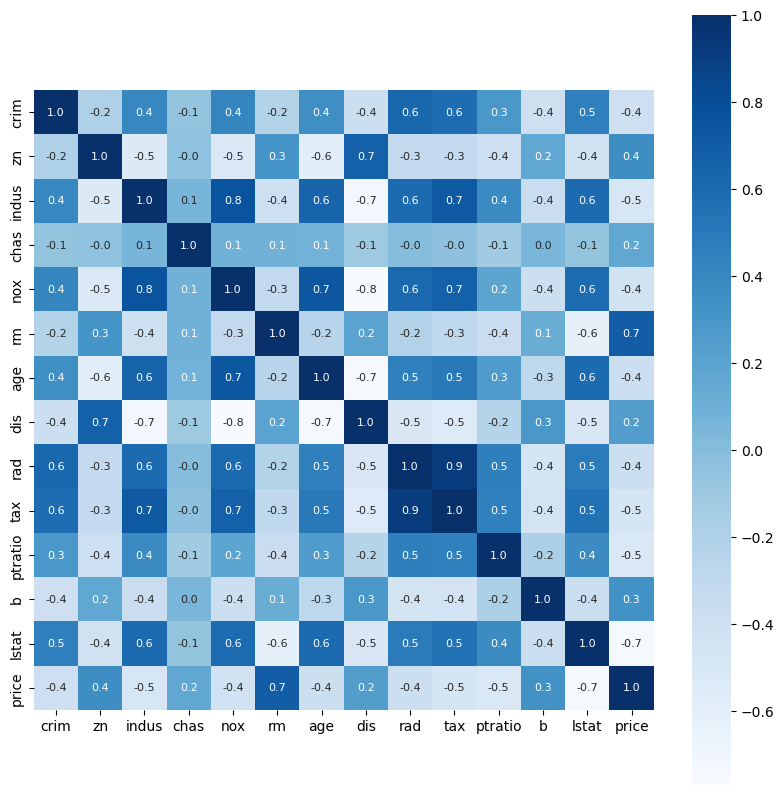

In [193]:
# Constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

# Spliting the data and Target


In [194]:
# spliting the data into features and target
X = house_Price_dataset.drop(['price'], axis=1)
Y = house_Price_dataset['price']

In [195]:
# print both feature and target
print(X)
print(Y)

        crim    zn  indus  chas    nox  ...  rad    tax  ptratio       b  lstat
0    0.00632  18.0   2.31     0  0.538  ...    1  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07     0  0.469  ...    2  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07     0  0.469  ...    2  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18     0  0.458  ...    3  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18     0  0.458  ...    3  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93     0  0.573  ...    1  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93     0  0.573  ...    1  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93     0  0.573  ...    1  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93     0  0.573  ...    1  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93     0  0.573  ...    1  273.0     21.0  396.90   7.88

[506 rows x 13 columns]
0      24.0
1  

## Spilting Data into Train and Test

In [196]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(506, 13) (404, 13) (102, 13) (404,) (102,)


# Model Training 



## XGBoost Regressor

In [197]:
#load the model
model = XGBRegressor()

In [198]:
# training the model with X_train & Y_train
model.fit(X_train, Y_train) 

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


## Evaluation

Prediction on training data

In [199]:
# accuracy jfor prediction on training data
training_data_prediction = model.predict(X_train)


In [200]:
print(training_data_prediction)

[23.112196  20.992601  20.10438   34.67932   13.920501  13.499354
 21.998383  15.206723  10.89543   22.67402   13.795236   5.602332
 29.808502  49.98666   34.89634   20.594336  23.388903  19.2118
 32.69294   19.604128  26.978151   8.405952  46.00062   21.70406
 27.084402  19.372278  19.297894  24.79984   22.608278  31.707775
 18.53683    8.703393  17.40025   23.698814  13.29729   10.504759
 12.693588  24.994888  19.694864  14.911037  24.20254   24.991112
 14.901547  16.987965  15.592753  12.704759  24.505623  15.007718
 49.999355  17.509344  21.18844   31.999287  15.606071  22.902134
 19.309835  18.697083  23.302961  37.19767   30.102247  33.117855
 20.993683  50.00471   13.40048    5.002565  16.50862    8.4016905
 28.651423  19.49218   20.595366  45.404697  39.808857  33.4055
 19.81498   33.406376  25.30206   49.998615  12.544487  17.433802
 18.602612  22.601418  50.004013  23.814182  23.313164  23.097467
 41.71243   16.112017  31.604454  36.09397    7.0009975 20.406271
 19.992195  12



# 📌 Accuracy Measures

## 🧠 1. **Classification Accuracy Measures**

Used when the output is a **class** (e.g., Spam/Not Spam, 0/1).

### ✅ **Accuracy**

Shows how many predictions were correct.

**Accuracy = (Correct Predictions / Total Predictions)**

---

### ✅ **Precision**

Out of all **predicted positives**, how many were actually positive?

---

### ✅ **Recall**

Out of all **actual positives**, how many did the model correctly find?

---

### ✅ **F1-Score**

The balance between **precision** and **recall**.

---

## 📈 2. **Regression Accuracy Measures**

Used when the output is a **number** (e.g., Price, Age, Salary).

### ✅ **MAE (Mean Absolute Error)**

Average of absolute errors.
Shows **how far predictions are from actual values** on average.

---

### ✅ **MSE (Mean Squared Error)**

Squares the error → penalizes **big mistakes** more.

---

### ✅ **RMSE (Root Mean Squared Error)**

Square root of MSE.
Gives error in the **same units as the target** (e.g., price in ₹).

---

### ✅ **R² Score**

Tells how well the model fits the data.
Ranges from **0 to 1** → **Closer to 1 = better model**.






# ⭐ How to Know if a Score is Good or Bad?

## ✅ 1. **R² Score**

* Tells how well the model explains the data.
* Range: **−∞ to 1**

### ✔ Good:

* **0.7 to 1.0** → Good
* **0.9 to 1.0** → Excellent

### ✘ Bad:

* **Below 0.5** → Poor
* **Negative** → Very bad (worse than random guessing)

👉 **Simple rule:**
**Closer to 1 = Better**

---

## ✅ 2. **MAE (Mean Absolute Error)**

* MAE tells **how far** predictions are from actual values on average.

### ✔ Good:

* **Small MAE value** (close to 0)

### ✘ Bad:

* **Large MAE value**

👉 **BUT:**
What is "small" depends on your target value range.

### Example:

If house prices start from **₹100,000 to ₹50,00,000**:

* MAE = **2000** → Good (very small error)
* MAE = **300,000** → Bad (too big error)

👉 **Simple rule:**
**MAE should be much smaller than the typical values in your dataset.**

---

## ✅ 3. **MSE & RMSE**

* Similar logic to MAE.
* Lower = better.

👉 **Simple rule:**
**If RMSE is small compared to actual value range → Good model.**

---

# ⭐ Simple Way to Judge (Like a Checklist)

### 📌 Step 1: Look at **R²**

* If **≥ 0.7 → Good**
* If **≥ 0.9 → Excellent**
* If **< 0.5 → Bad**

### 📌 Step 2: Look at **MAE/RMSE**

* Compare the error value to the actual dataset values.

Example:

* Actual house prices: around **300**
* MAE = **2** → Excellent
* MAE = **40** → Not good

---

# ⭐ Final Simple Example

Suppose you're predicting **MEDV (House Price)** in the Boston dataset:

* Actual average price = **22**

* Model MAE = **0.5**
  → Error is very small → **Good**

* Model MAE = **15**
  → Error is too large → **Bad**





In [201]:
# This is Regression Problem so we will use r2_score to check the accuracy
score_1 = metrics.r2_score(Y_train,training_data_prediction)

#  Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train,training_data_prediction)
print("R2 Score : ", score_1)
print("Mean Absolute Error : ", score_2)

R2 Score :  0.9999980039471451
Mean Absolute Error :  0.0091330346494618


# Visualizing the actual Prices and Predicted Prices

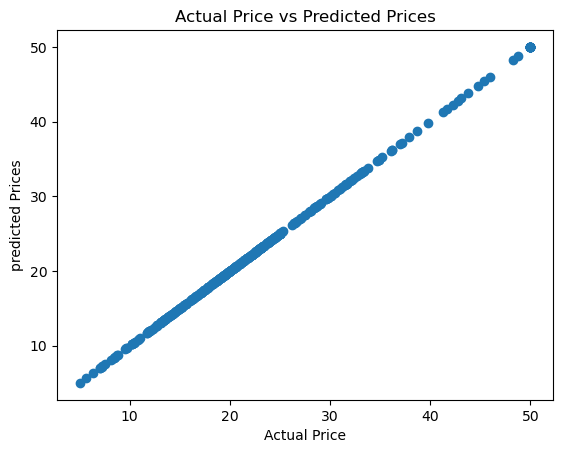

In [202]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted Prices")
plt.title("Actual Price vs Predicted Prices")
plt.show()

## Test Data Prediction

In [203]:
# Prediction on Test Data
test_data_prediction = model.predict(X_test)

In [204]:


# R2 Score
score_1 = metrics.r2_score(Y_test, test_data_prediction)
print("R2 Score : ", score_1)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error : ", score_2)


R2 Score :  0.9051721149855378
Mean Absolute Error :  2.0748727686264927


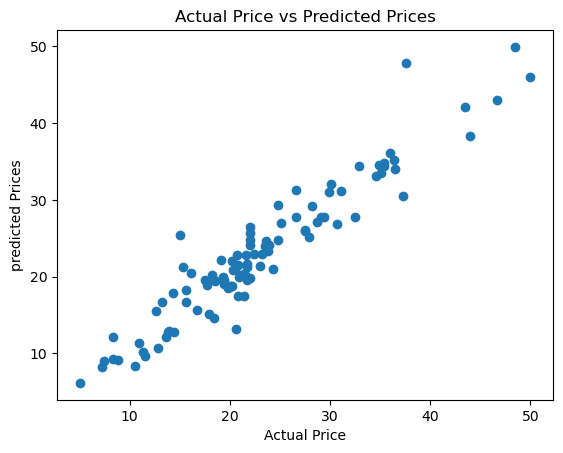

In [205]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("predicted Prices")
plt.title("Actual Price vs Predicted Prices")
plt.show()